In [ ]:
!pip3 install pyspark

**Reading Data from CSV file**

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession \
 .builder \
 .appName("Python Spark SQL basic example") \
 .config("spark.some.config.option", "some-value") \
 .getOrCreate()

In [ ]:
!pip install itables

In [ ]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

 **create DataFrame and display the content**

In [ ]:
fifa_df = spark.read.load("CompleteDataset.csv", format="csv", inferSchema=True,
 header=True)
fifa_df.show()

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [ ]:
#structure of dataframe
fifa_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


In [ ]:
#information about columns
fifa_df.columns

['_c0',
 'Name',
 'Age',
 'Photo',
 'Nationality',
 'Flag',
 'Overall',
 'Potential',
 'Club',
 'Club Logo',
 'Value',
 'Wage',
 'Special',
 'Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'Ball control',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Free kick accuracy',
 'GK diving',
 'GK handling',
 'GK kicking',
 'GK positioning',
 'GK reflexes',
 'Heading accuracy',
 'Interceptions',
 'Jumping',
 'Long passing',
 'Long shots',
 'Marking',
 'Penalties',
 'Positioning',
 'Reactions',
 'Short passing',
 'Shot power',
 'Sliding tackle',
 'Sprint speed',
 'Stamina',
 'Standing tackle',
 'Strength',
 'Vision',
 'Volleys',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'ID',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'Preferred Positions',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST']

In [ ]:
#dataframe count
fifa_df.count()

17981

In [ ]:
#dataframe column count
len (fifa_df.columns)

75

In [ ]:
fifa_df.select('Name','Nationality','club').show()

+-----------------+-----------+-------------------+
|             Name|Nationality|               club|
+-----------------+-----------+-------------------+
|Cristiano Ronaldo|   Portugal|     Real Madrid CF|
|         L. Messi|  Argentina|       FC Barcelona|
|           Neymar|     Brazil|Paris Saint-Germain|
|        L. Suárez|    Uruguay|       FC Barcelona|
|         M. Neuer|    Germany|   FC Bayern Munich|
|   R. Lewandowski|     Poland|   FC Bayern Munich|
|           De Gea|      Spain|  Manchester United|
|        E. Hazard|    Belgium|            Chelsea|
|         T. Kroos|    Germany|     Real Madrid CF|
|       G. Higuaín|  Argentina|           Juventus|
|     Sergio Ramos|      Spain|     Real Madrid CF|
|     K. De Bruyne|    Belgium|    Manchester City|
|      T. Courtois|    Belgium|            Chelsea|
|       A. Sánchez|      Chile|            Arsenal|
|        L. Modrić|    Croatia|     Real Madrid CF|
|          G. Bale|      Wales|     Real Madrid CF|
|        S. 

In [ ]:
fifa_df.select('Name','Long shots').distinct().show()

+-----------------+----------+
|             Name|Long shots|
+-----------------+----------+
|Cristiano Ronaldo|        92|
|      J. Cuadrado|        80|
|      M. Brozović|        79|
|          A. Rami|        58|
|       D. Abraham|        65|
|     Borja Bastón|        73|
|       J. Montero|        68|
|      T. Barnetta|        74|
|          Wallace|        26|
|       A. Barreca|        42|
|    Y. Benalouane|        39|
|          Juankar|        64|
|        D. Appiah|        38|
|   Rafael Martins|        69|
|          Granell|        77|
|     A. Cornelius|        68|
|         J. Henry|        75|
|        M. Ozdoev|        69|
|            Fábio|        58|
|       T. Dingomé|        60|
+-----------------+----------+
only showing top 20 rows



**filter on fifa_df DataFrame to select people older than 21**

In [ ]:
fifa_df.filter(fifa_df['age'] > 21).show()

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [ ]:
#Count the number of players by age
fifa_df.groupBy("age").count().show()

+---+-----+
|age|count|
+---+-----+
| 31|  671|
| 34|  272|
| 28| 1051|
| 26| 1202|
| 27| 1152|
| 44|    2|
| 22| 1324|
| 16|   13|
| 20| 1245|
| 40|    8|
| 19| 1069|
| 41|    3|
| 37|   69|
| 17|  258|
| 35|  191|
| 39|   20|
| 23| 1394|
| 38|   36|
| 25| 1522|
| 24| 1334|
+---+-----+
only showing top 20 rows



**SQL Queries and Visualisation**

In [ ]:
#Register the dataframe as a SQL temporary view
fifa_df.createOrReplaceTempView("FifaView")

In [ ]:
#Retrieving the content from the dataset
sqlDF = spark.sql("SELECT * FROM FifaView")
sqlDF.show()

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [ ]:
#counting the number of players by age
sqlDF = spark.sql("SELECT age, count(*) as count from FifaView GROUP BY age")
sqlDF.show()

+---+-----+
|age|count|
+---+-----+
| 31|  671|
| 34|  272|
| 28| 1051|
| 26| 1202|
| 27| 1152|
| 44|    2|
| 22| 1324|
| 16|   13|
| 20| 1245|
| 40|    8|
| 19| 1069|
| 41|    3|
| 37|   69|
| 17|  258|
| 35|  191|
| 39|   20|
| 23| 1394|
| 38|   36|
| 25| 1522|
| 24| 1334|
+---+-----+
only showing top 20 rows



<Axes: xlabel='age'>

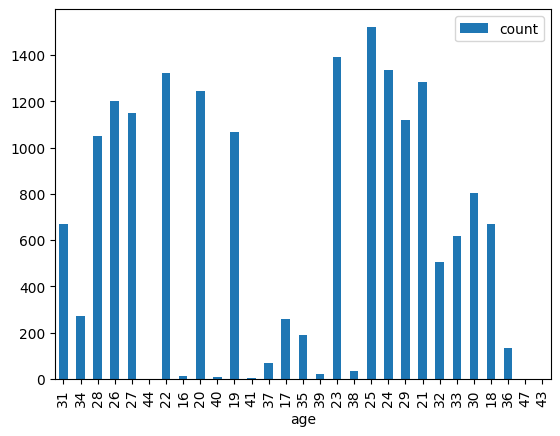

In [ ]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#converting the SQL dataframe to pandas dataframe
pandas_df = sqlDF.toPandas()

#Plot the bar chart
pandas_df.plot(x='age',y='count',kind = 'bar')

<Axes: xlabel='age'>

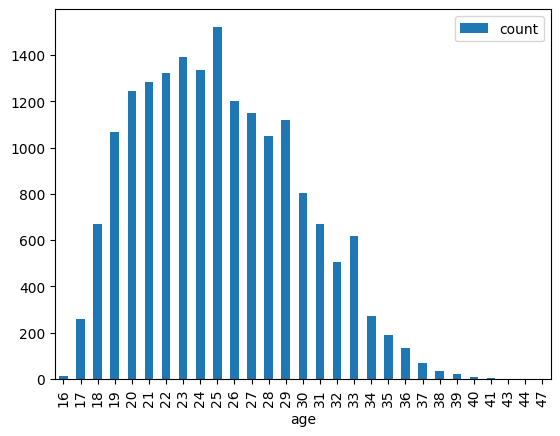

In [ ]:
#order the output by adding the sort.value ()

pandas_df.sort_values(by='age',ascending=True).plot(x='age',y='count',kind='bar')

**Count the number of players in each club**

In [ ]:
sqlDF = spark.sql("SELECT club, count(*) FROM FifaView GROUP BY club")
sqlDF.show()

+--------------------+--------+
|                club|count(1)|
+--------------------+--------+
|             Palermo|      28|
|         Yeovil Town|      21|
|  1. FC Union Berlin|      27|
|  Santiago Wanderers|      20|
|               Carpi|      30|
|Evkur Yeni Malaty...|      30|
|          Sagan Tosu|      25|
|            FC Basel|      25|
|  Argentinos Juniors|      28|
|       Karlsruher SC|      27|
|  Lorca Deportiva CF|      29|
|     SC Paderborn 07|      28|
|     Cheltenham Town|      28|
|San Lorenzo de Al...|      28|
|         SC Freiburg|      32|
|  SpVgg Unterhaching|      28|
|Atletico Nacional...|      28|
|Universidad Católica|      20|
|         GFC Ajaccio|      25|
|           FC Luzern|      27|
+--------------------+--------+
only showing top 20 rows



Count the number of players in each club and displays those have more than 33
members **bold text**

In [ ]:
sqlDF = spark.sql("Select club, count(*) FROM FifaView GROUP BY club HAVING Count(*) > 33")
sqlDF.show()

+------------------+--------+
|              club|count(1)|
+------------------+--------+
| Manchester United|      34|
|     UD Las Palmas|      34|
|              NULL|     248|
|Olympique Lyonnais|      34|
|     VfL Wolfsburg|      34|
|          OGC Nice|      34|
|     Villarreal CF|      35|
|         FC Nantes|      34|
| Borussia Dortmund|      34|
+------------------+--------+



<Axes: ylabel='count(1)'>

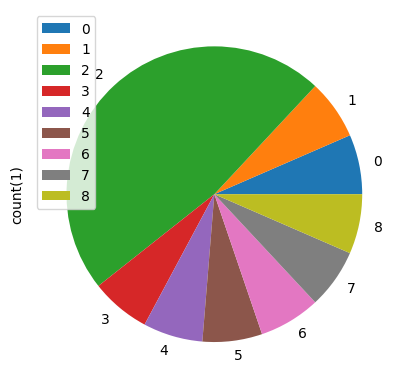

In [ ]:
# output as a bar graph
pandas_df = sqlDF.toPandas()
pandas_df.plot(x='club',y='count(1)',kind='pie')

In [ ]:
%%shell
jupyter nbconvert --to html /content/Tutorial5_FIFA18.ipynb

[NbConvertApp] Converting notebook /content/Tutorial5_FIFA18.ipynb to html
[NbConvertApp] Writing 731645 bytes to /content/Tutorial5_FIFA18.html
